In [2]:
import os
import torch
import matplotlib 
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.interpolate import griddata

In [18]:
path_to_results = '/Users/obando_c/Documents/Neuro/EmergencyBraking/results/'
path_to_example = '1__debug/lightning_logs/version_5/checkpoints/epoch=64.ckpt'
path_to_example = '1__debug/lightning_logs/version_20/checkpoints/epoch=98.ckpt'
path_to_example = '1__debug/lightning_logs/version_21/checkpoints/epoch=79.ckpt'
path_to_example = '1__debug/lightning_logs/version_22/checkpoints/epoch=55.ckpt'
path_to_example = '1__debug/lightning_logs/version_23/checkpoints/epoch=55.ckpt'
#path_to_example = '1__debug/lightning_logs/version_24/checkpoints/epoch=90.ckpt'
#path_to_example = '1__debug/lightning_logs/version_25/checkpoints/epoch=83.ckpt'
path_to_example = '3__performance_modes/lightning_logs/version_2/checkpoints/epoch=463.ckpt'
path_to_example = '3__performance_modes/lightning_logs/version_3/checkpoints/epoch=389.ckpt'
path_to_checkpoint = os.path.normpath(os.path.join(path_to_results, path_to_example))

In [19]:
checkpoint = torch.load(path_to_checkpoint)
# hparams = checkpoint['hparams']
state_dict = checkpoint['state_dict']
spatial_filtering_w = torch.flatten(state_dict['net.spatial_filtering.transform.weight'])

In [20]:
path_data_mat = '/Users/obando_c/Documents/Neuro/EmergencyBraking/Data/Raw/'
file_name = "VPja.mat" # VPja.mat ; VPbax.mat
path_postprocess_mat = '/Users/obando_c/Documents/Neuro/EmergencyBraking/data/post_processed/Balanced_01/'

In [21]:
# Extract data mnt - contains information on the EVENTS
with h5py.File(path_data_mat + file_name, 'r') as f:
    mnt = f.get('mnt')
    print("Items in mnt", list(mnt.items()) )
    x_pos_allChannels = np.array(mnt.get('x'))
    y_pos_allChannels = np.array(mnt.get('y'))

Items in mnt [('box', <HDF5 dataset "box": shape (70, 2), type "<f8">), ('box_sz', <HDF5 dataset "box_sz": shape (70, 2), type "<f8">), ('clab', <HDF5 dataset "clab": shape (69, 1), type "|O">), ('pos_3d', <HDF5 dataset "pos_3d": shape (69, 3), type "<f8">), ('scale_box', <HDF5 dataset "scale_box": shape (1, 2), type "<f8">), ('scale_box_sz', <HDF5 dataset "scale_box_sz": shape (1, 2), type "<f8">), ('x', <HDF5 dataset "x": shape (1, 69), type "<f8">), ('y', <HDF5 dataset "y": shape (1, 69), type "<f8">)]


In [22]:
channels_eeg = np.arange(61)
channels_eeg = np.delete(channels_eeg, [0, 5])
x_pos = x_pos_allChannels[0][channels_eeg]
y_pos = y_pos_allChannels[0][channels_eeg]

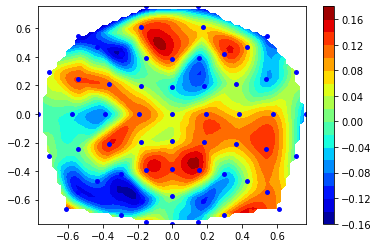

In [23]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

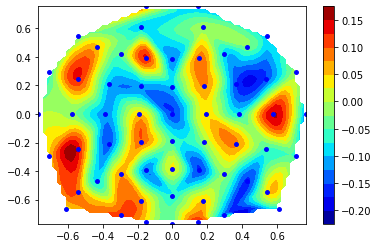

In [10]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

In [17]:
np.where(abs(spatial_filtering_w)<0.1)

(array([ 0,  2,  3,  4,  5,  6,  9, 10, 11, 13, 17, 18, 21, 22, 23, 25, 27,
        28, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 49, 50, 52,
        53, 54, 56, 57]),)

In [16]:
spatial_filtering_w

tensor([ 0.0854, -0.1162, -0.0907, -0.0126, -0.0494,  0.0562, -0.0448,  0.1273,
        -0.1283,  0.0878, -0.0883, -0.0333, -0.1005, -0.0785,  0.1244, -0.1031,
        -0.1173, -0.0936,  0.0787, -0.1482, -0.1469, -0.0064,  0.0026, -0.0173,
        -0.1163,  0.0484, -0.1505,  0.0401, -0.0769,  0.1519, -0.1435,  0.0409,
         0.1361, -0.1428,  0.0924, -0.0564, -0.0187,  0.0800, -0.0570, -0.0554,
         0.0269,  0.0926, -0.0878,  0.0685, -0.1261,  0.0277, -0.1540, -0.0168,
        -0.1608,  0.0335, -0.0836,  0.1118,  0.0743, -0.0704,  0.0492, -0.1354,
         0.0367, -0.0476,  0.1310])

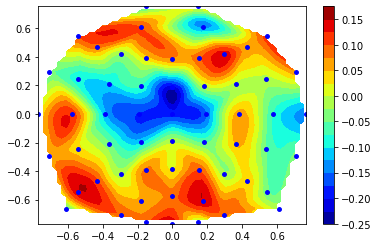

In [7]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

(229, 320)


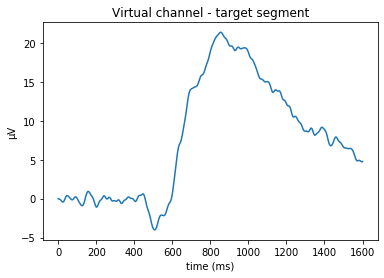

In [24]:
nn = 229
virtual_chs = []
for ne in range(nn):
    mat_pp = np.load(path_postprocess_mat + 'VPja.mat_segment_' + str(ne) + '_event.npy').T
    spatial_filtering_w_np = spatial_filtering_w.numpy().reshape(59,1)
    #spatial_filtering_w_np = np.ones(59).reshape(59,1)
    virtual_ch = np.dot(mat_pp ,spatial_filtering_w_np)
    virtual_chs.append(virtual_ch)
virtual_chs= np.asarray(virtual_chs).reshape(229,320)
print(virtual_chs.shape)
x1 = np.linspace(start = 0, stop = len(virtual_chs.mean(0))*5, num = len(virtual_chs.mean(0)))
plt.plot(x1,virtual_chs.mean(0))
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title("Virtual channel - target segment")
#plt.title("Target segment (mean)")
plt.savefig("Plots/virtualChannel_targetSgment.png")

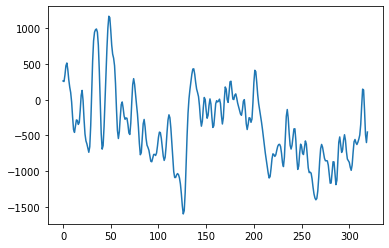

In [22]:
plt.plot(virtual_ch)

In [17]:
len(x1)

320

In [28]:
np.save("spatial_filtering_w_np", spatial_filtering_w_np)

(229, 320)


Text(0.5, 1.0, 'Mean target segment')

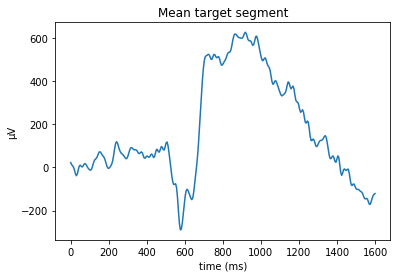

In [19]:
nn = 229
virtual_chs = []
for ne in range(nn):
    mat_pp = np.load(path_postprocess_mat + 'VPja.mat_segment_' + str(ne) + '_event.npy').T
    #spatial_filtering_w_np = spatial_filtering_w.numpy().reshape(59,1)
    spatial_filtering_1 = np.ones(59).reshape(59,1)
    virtual_ch = np.dot(mat_pp ,spatial_filtering_1)
    virtual_chs.append(virtual_ch)
virtual_chs= np.asarray(virtual_chs).reshape(229,320)
print(virtual_chs.shape)
x1 = np.linspace(start = 0, stop = len(virtual_chs.mean(0))*5, num = len(virtual_chs.mean(0)))
plt.plot(x1,virtual_chs.mean(0))
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title("Mean target segment")

In [14]:
mat_pp.shape

(320, 59)

(229, 320)


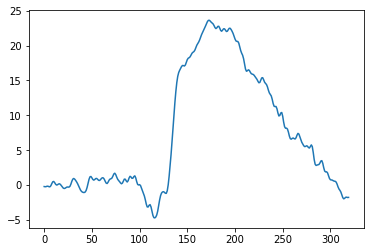

In [240]:
nn = 229
virtual_chs = []
for ne in range(nn):
    mat_pp = np.load(path_postprocess_mat + 'VPja.mat_segment_' + str(ne) + '_event.npy').T
    spatial_filtering_w_np = spatial_filtering_w.numpy().reshape(59,1)
    virtual_ch = np.dot(mat_pp ,spatial_filtering_w_np)
    virtual_chs.append(virtual_ch)
virtual_chs= np.asarray(virtual_chs).reshape(229,320)
print(virtual_chs.shape)
plt.plot(virtual_chs.mean(0))

(229, 320)


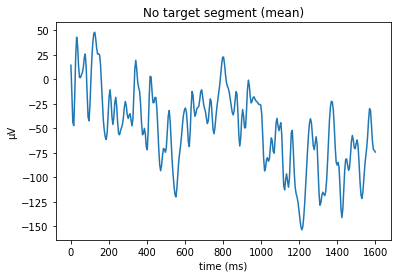

In [29]:
nn = 229
virtual_chs = []
for ne in range(nn):
    mat_pp = np.load(path_postprocess_mat + 'VPja.mat_segment_' + str(ne) + '_noevent.npy').T
    spatial_filtering_w_np = spatial_filtering_w.numpy().reshape(59,1)
    spatial_filtering_w_np = np.ones(59).reshape(59,1)
    virtual_ch = np.dot(mat_pp ,spatial_filtering_w_np)
    virtual_chs.append(virtual_ch)
virtual_chs= np.asarray(virtual_chs).reshape(229,320)
print(virtual_chs.shape)
x1 = np.linspace(start = 0, stop = len(virtual_chs.mean(0))*5, num = len(virtual_chs.mean(0)))
plt.plot(x1,virtual_chs.mean(0))
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title("No target segment (mean)")
#plt.savefig("Plots/virtualChannel_notargetSgment.png")
plt.savefig("Plots/notargetSgment.png")

(320, 59)
(59, 1)
(320, 1)


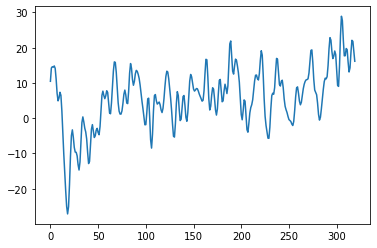

In [217]:
mat_pp = np.load(path_postprocess_mat + 'VPja.mat_segment_13_noevent.npy').T
spatial_filtering_w_np = spatial_filtering_w.numpy().reshape(59,1)
print(mat_pp.shape)
print(spatial_filtering_w_np.shape)
virtual_ch = np.dot(mat_pp ,spatial_filtering_w_np)
print(virtual_ch.shape)
plt.plot(virtual_ch)

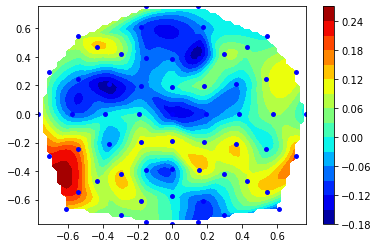

In [168]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

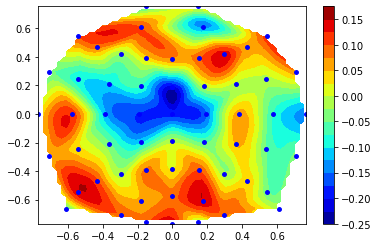

In [161]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

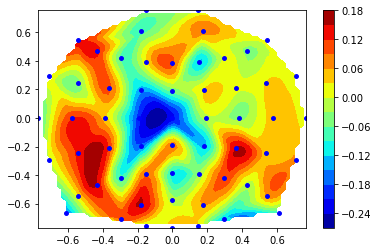

In [158]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

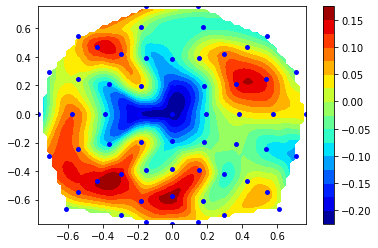

In [151]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

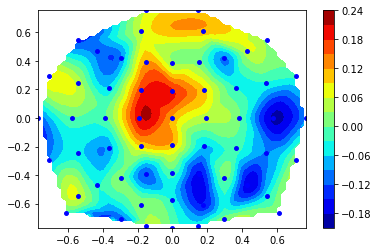

In [148]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

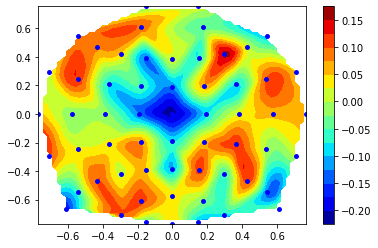

In [143]:
xi = np.linspace(-2,6,300);
yi = np.linspace(-2,6,300);
zi = griddata((x_pos, y_pos), spatial_filtering_w, (xi[None,:], yi[:,None]), method='cubic')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x_pos,y_pos,marker='o',c='b',s=15)
plt.xlim(min(x_pos),max(x_pos))
plt.ylim(min(y_pos),max(y_pos))

plt.show()

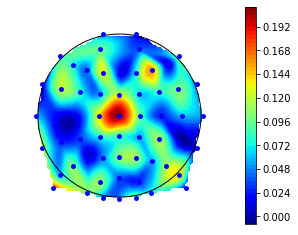

In [142]:
x = x_pos
y = y_pos

xy_center = [0,0]
radius = 0.75
# make figure
fig = plt.figure()

# set aspect = 1 to make it a circle
ax = fig.add_subplot(111, aspect = 1)

# use different number of levels for the fill and the lines
CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1)
#ax.contour(xi, yi, zi, 15, colors = "grey", zorder = 2)

# make a color bar
cbar = fig.colorbar(CS, ax=ax)

# add the data points
# I guess there are no data points outside the head...
ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)

# draw a circle
# change the linewidth to hide the 
circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none")
ax.add_patch(circle)

# make the axis invisible 
for loc, spine in ax.spines.items():
    # use ax.spines.items() in Python 3
    spine.set_linewidth(0)

# remove the ticks
ax.set_xticks([])
ax.set_yticks([])

# set axes limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show() 

In [7]:
checkpoint = torch.load(path_to_checkpoint)
# hparams = checkpoint['hparams']
state_dict = checkpoint['state_dict']

In [47]:
spatial_filtering_w = torch.flatten(state_dict['net.spatial_filtering.transform.weight'])

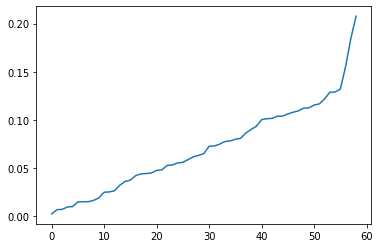

In [50]:
plt.plot(sorted(abs(spatial_filtering_w)))

tensor(10)